In [2]:
%matplotlib inline

12.208621051642577


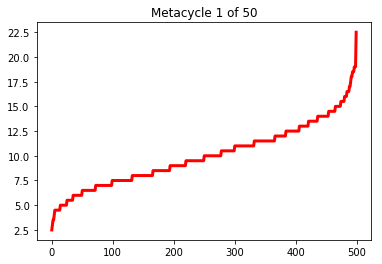

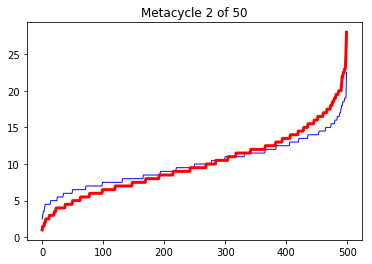

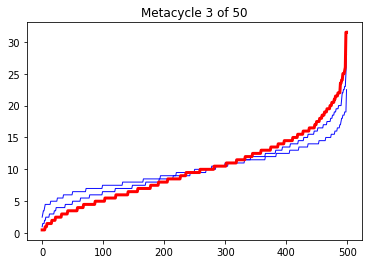

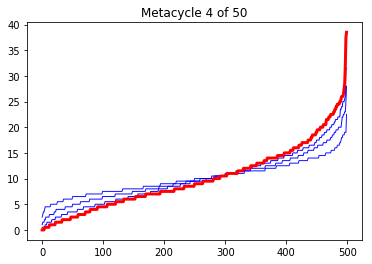

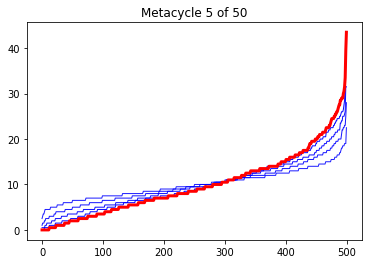

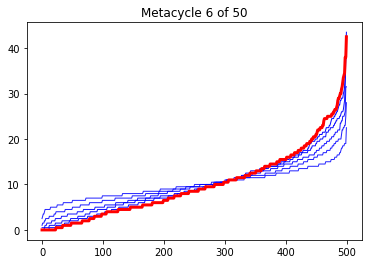

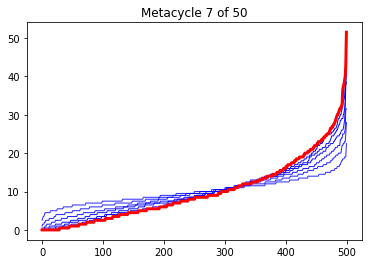

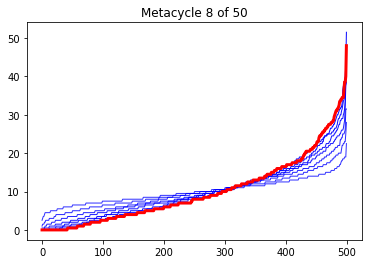

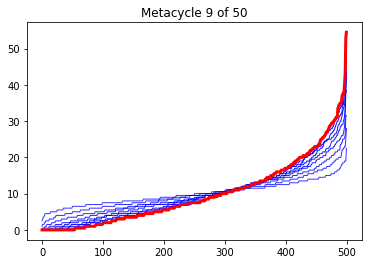

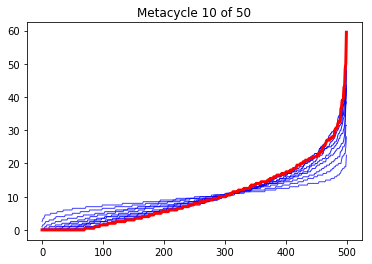

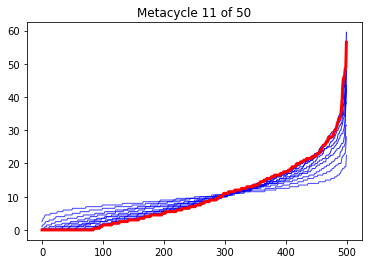

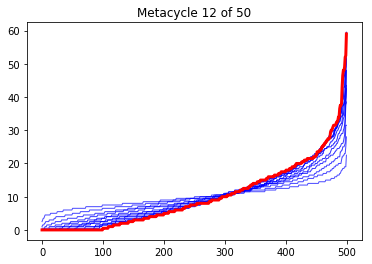

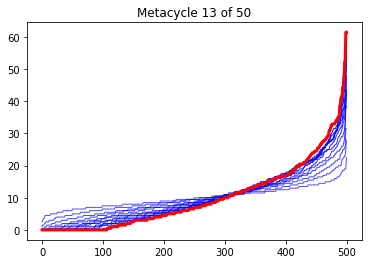

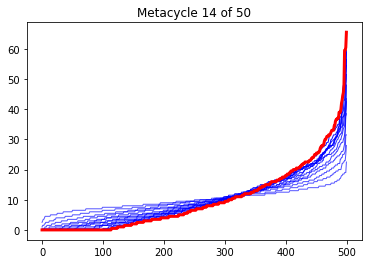

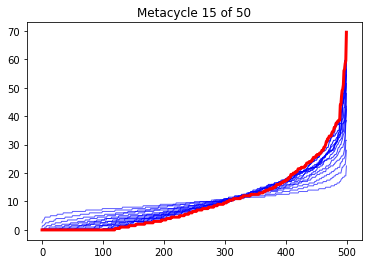

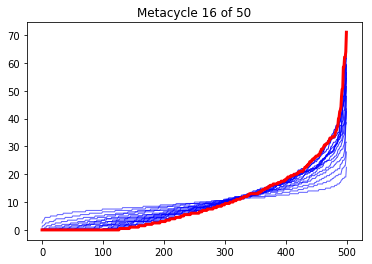

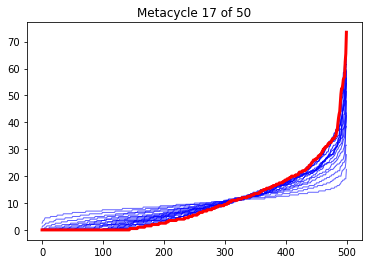

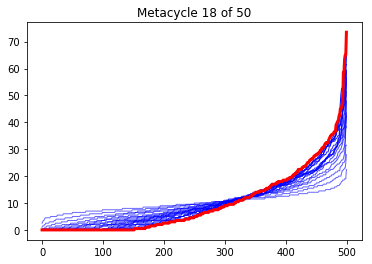

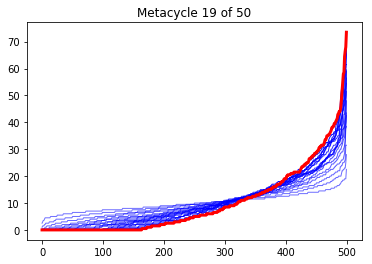

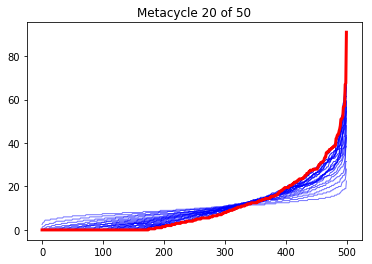

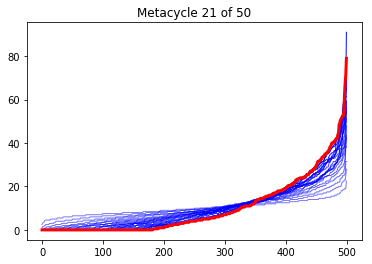

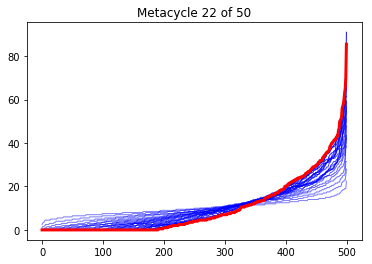

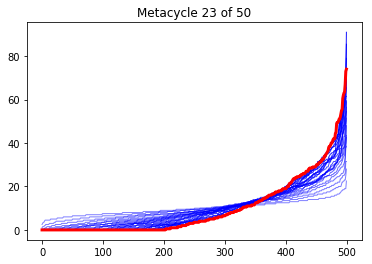

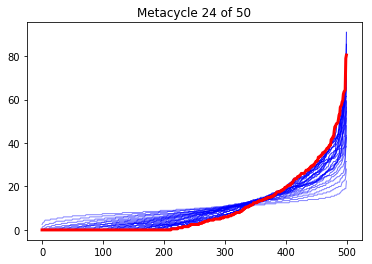

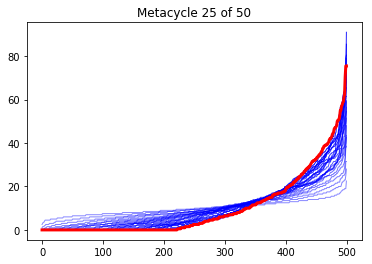

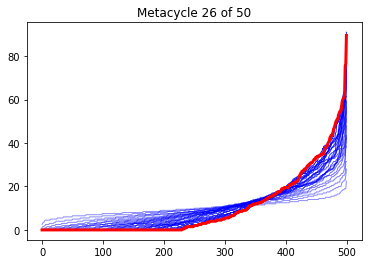

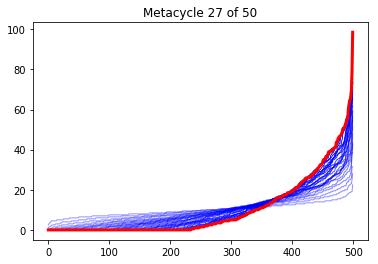

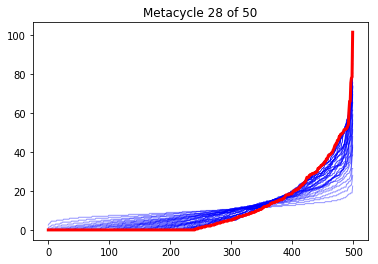

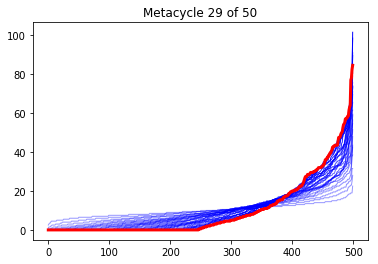

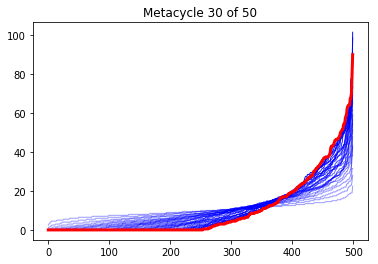

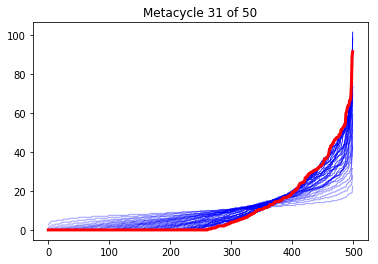

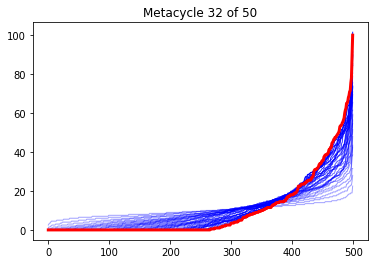

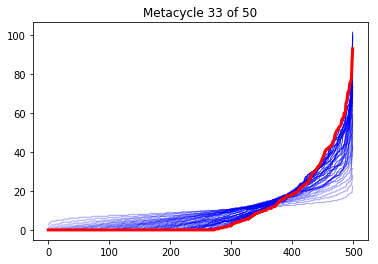

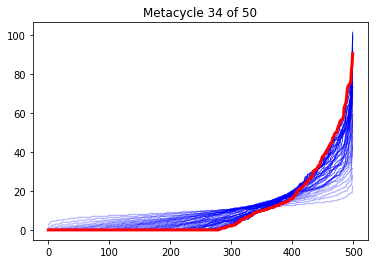

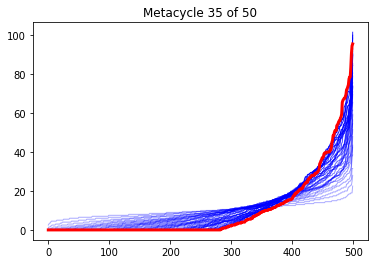

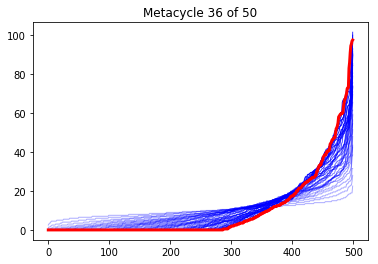

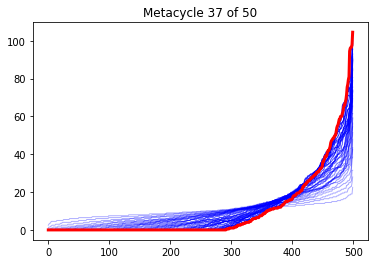

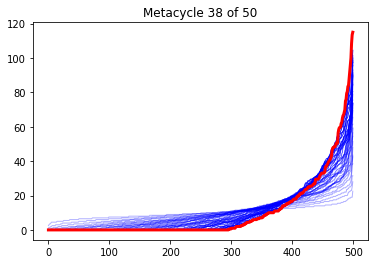

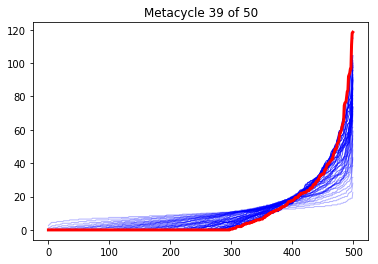

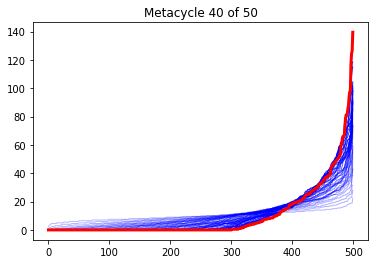

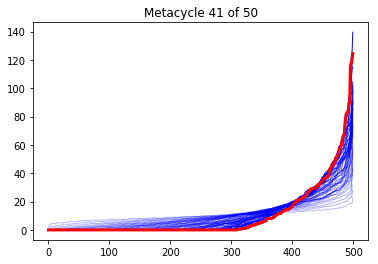

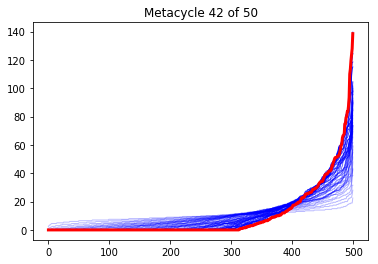

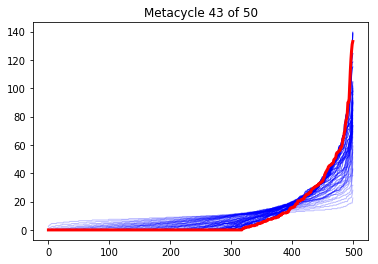

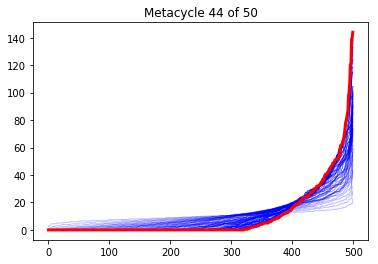

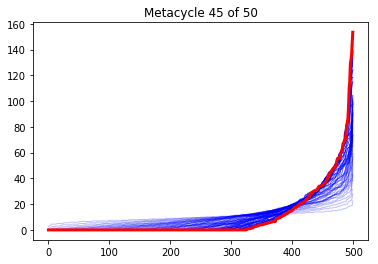

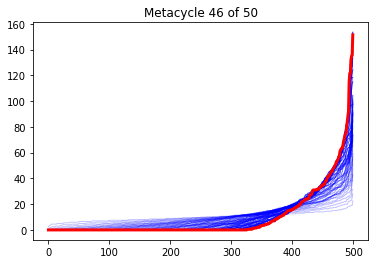

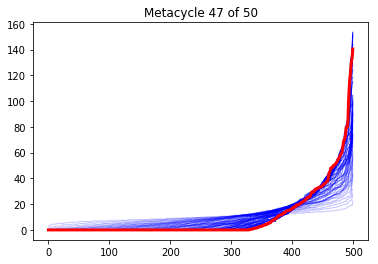

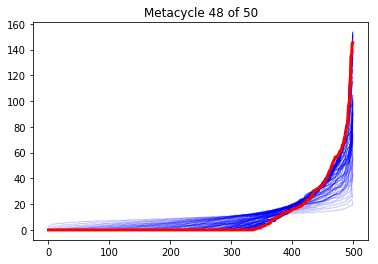

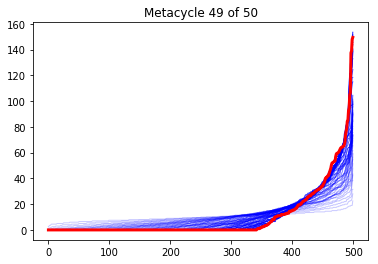

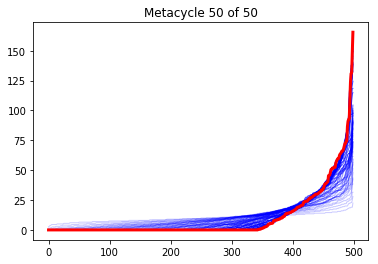

In [11]:
# THESE BITS OF CODE IMPORT USEFUL FUNCTIONS. DO NOT CHANGE THEM
import numpy as np
import matplotlib.pyplot as plt
import random

#####################################################
######## THESE ARE THE SIMULATION PARAMETERS ########
#####################################################

# How many people and how many dollars?
num_dollars = 5000
num_players = 500

# how many trades occur for each dollar before we apply the UBI and take a snapshot
cycles_per_dollar = 2

# how many snapshots and UBI redistributions in the simulation
metacycles = 50

# This term is an attempt to model something like a minimum wage. In the trading cycle, a person's likelihood
# of receiving a dollar is proportional to their share of the total number of dollars. This bias term allows
# the simulation to dilute this effect, which evens out each person's likelihood of receiving a dollar. At 
# sufficiently high values, this term could make it so that everyone's likelihood is equal.
bias = 0
bias_range = num_dollars + bias * num_players


# What percent of each person's wealth is taxed and redistributed as UBI 0=0%, 0.5=50%, 1=100%, and so on.
ubi_tax_rate = 0

# This line calculates what the UBI payment will be. 
ubi = ubi_tax_rate * num_dollars / num_players

####################################################
############ END OF PARAMETERS SECTION #############
####################################################


# This code creates a ledger of how many dollars each person has and initially gives everyone the same amount of money
ledger = np.array([num_dollars/num_players]*num_players)

# This code rounds each ledger entry to the nearest cent
ledger = np.round(ledger, decimals=2)

# This code creates an empty data structure to keep track of where things stand at the end of each trading cycle
ledger_history_log = np.zeros((num_players, metacycles))

max_range = ledger[0]

for i in range(metacycles * cycles_per_dollar * num_dollars):
    max_range = max_range + (max_range / num_dollars) * ((num_dollars - max_range) / num_dollars) / num_players
print(max_range)


# The FOR keyword signifies that a section of code is to be run multiple times. Everything beneath this line runs
# a number of times equal to the value assigned to the variable 'metacycles' up above. The variable 'metacycle'
# tracks which cycle the simulation is currently on.
for metacycle in range(metacycles):
    
    # The IF keyword runs a section of code IF a certain condition is true. In this case, if the 'ubi_tax_rate'
    # variable is not zero, the code up to the next FOR section will run. This particular section applies the UBI
    if ubi_tax_rate:
        # This line calculates the UBI tax by applying the tax rate to the ledger and stores each person's tax amount
        # in the 'ubi_tax' variable
        ubi_tax = np.round(ledger * ubi_tax_rate, decimals=2)

        # This line calculates the total amount of UBI tax collects
        ubi_pool = ubi_tax.sum()
        
        # This line deducts the UBI tax and distributes the UBI payment to each person
        ledger = ledger - ubi_tax + ubi
        
        # This line sorts the ledger in ascending order
        ledger = np.sort(ledger)
        
        # Sometimes the rounding step causes there to be a few cents missing. This line makes up the difference 
        # by adjusting the wealthiest person's balance by a that small amount. The wealthiest person is chosen
        # because such an adjustment make the smallest proportional adjustment to their wealth
        ledger[-1] += (ubi_pool - num_dollars * ubi_tax_rate)

    # This FOR section applies the exchange logic. Each player spends and collects money with a likelihood 
    # proportional to their share of all the dollars. By selecting a dollar at random, we can randomly select
    # with a likelihood portional to their share of the dollars. This type of proportionality is seen in the
    # real world through all orders of magnitude.
    for _ in range(int(cycles_per_dollar * num_dollars)):
        # This line adjusts each person's likelihood according to the 'bias' variable set above. If 'bias'
        # is set to zero, 'biased_ledger' and 'ledger' are identical
        biased_ledger = np.add.accumulate(ledger + bias)

        # These two lines select two dollars at random, adjusting for the bias term.
        selector1 = random.uniform(0,bias_range)
        selector2 = random.uniform(0,bias_range)
        
        # These two lines translate the selected dollars into selected persons
        player1 = len(np.where(biased_ledger <= selector1)[0])
        player2 = len(np.where(biased_ledger <= selector2)[0])
        
        # an amount of money is selected for trading. If a person has less than or equal to $0.50, they trade away everything.
        # if not, they trade $0.50.
        amt = min(ledger[player2],.5)
        
        # players exchange funds
        ledger[player1] += amt
        ledger[player2] -= amt

    # This stores the current distribution of funds in the log
    ledger_history_log[:,metacycle] = np.sort(ledger)

    # Everything below here is stuff to graph the results.
    plt.clf()
    plt.title('Metacycle {} of {}'.format(metacycle+1, metacycles))
    alpha=1
    for line in reversed(ledger_history_log.T[:metacycle]):
        alpha*=(.2**(1/metacycles))
        plt.plot(line, color='blue',alpha=alpha, linewidth=1)
    plt.plot(np.sort(ledger), color='r', linewidth=3)
    plt.show()

In [13]:
%pip install


The following command must be run outside of the IPython shell:

    $ pip install

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/
